In [1]:
import analysis
import elbow
import iteration
import pandas as pd
%matplotlib inline
import numpy as np

# Elbow plot

In [2]:
# Import data
data = pd.read_csv("faithful.csv")

# Remove first column
data = data.drop(data.columns[0], axis=1)

# Normalize features
for column in data.columns:
    data[column] = analysis.normalization(data[column])

# Convert data into array
data_array = data.to_numpy()

Saved to plots/elbow.png


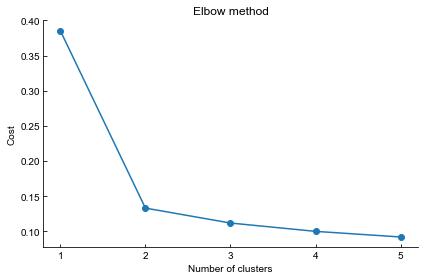

In [3]:
# Set the range of number of clusters
num_cluster = list(range(1, 6))

# Calculate cost function for each number of clusters
cost = []
for K in num_cluster:
    centroid_list = analysis.initialize(data, K)
    data_array = data.to_numpy()
    final_centroid, clusters = elbow.centroid_iteration(data_array, centroid_list, K)
    cost.append(elbow.cost_function(final_centroid, clusters, K))

# Plot elbow
elbow.plot_elbow(num_cluster, cost)

Elbow plot suggests that the appropriate number of clusters is 2.

# Implement k-means clustering for K = 2

In [4]:
K = 2

In [5]:
# Prepare the data again

# Import data
data = pd.read_csv("faithful.csv")

# Remove first column
data = data.drop(data.columns[0], axis=1)

# Normalize features
for column in data.columns:
    data[column] = analysis.normalization(data[column])

# Convert data into array
data_array = data.to_numpy()

# Randomly initialize K points
centroid_list = analysis.initialize(data,K)

Saved to plots/exploratory.png


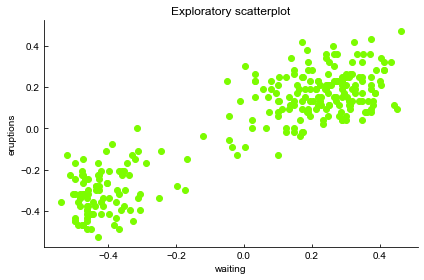

In [6]:
# Plot the initial data for exploration
analysis.plot_exploratory(data_array, 'waiting', 'eruptions')

Saved to plots/initialization.png


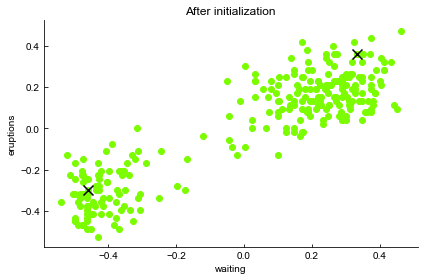

In [7]:
# Plot the data with initialization
analysis.plot_initialization(data_array, K, centroid_list, 'waiting', 'eruptions')

Saved to plots/iteration1.png
Saved to plots/iteration2.png
Saved to plots/iteration3.png


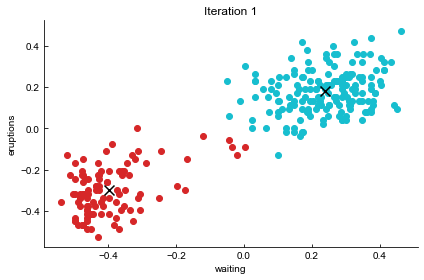

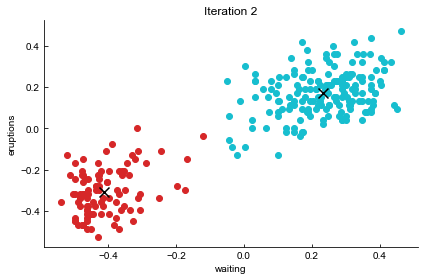

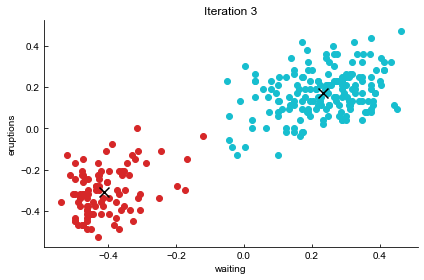

In [8]:
iteration = 0

while True:
    iteration += 1
    clusters = analysis.cluster_assignment(data_array, centroid_list, K)
    centroid_list = analysis.new_centroid(clusters, centroid_list)

    colors = [(214, 39, 40), (23, 190, 207), (148, 0, 211), (128, 128, 0), (165, 42, 42)]
    colors = [analysis.get_rgb(color) for color in colors]

    analysis.plot_iteration(iteration, clusters, centroid_list, K, colors, 'waiting', 'eruptions')

    if np.allclose(centroid_list[-(K * 2) : -K], centroid_list[-K :]):
        break

Points are assigned to the clusters after 3 iterations